# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [2]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [7]:
df = pd.read_csv('/Users/jialiuye/8-pandas-exploration-JY-Ye/data/ACRIS_-_Document_Control_Codes_20240430.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

5 rows, selected at random, from the data set.

In [8]:
df.sample(5)

,RECORD TYPE,DOC. TYPE,DOC. TYPE DESCRIPTION,CLASS CODE DESCRIPTION,PARTY1 TYPE,PARTY2 TYPE,PARTY3 TYPE
56,D,TERM,UCC3 TERMINATION,UCC AND FEDERAL LIENS,DEBTOR,SECURED PARTY,NaN
12,D,CODP,CONDEMNATION PROCEEDINGS,DEEDS AND OTHER CONVEYANCES,PARTY 1,PARTY 2,NaN
40,D,PSGN,UCC3 PARTIAL ASSIGNMENT,UCC AND FEDERAL LIENS,DEBTOR,SECURED PARTY,NaN
96,D,REIT,REAL ESTATE INV TRUST DEED,DEEDS AND OTHER CONVEYANCES,GRANTOR/SELLER,GRANTEE/BUYER,NaN
59,D,UCC3,UNIFORM COMMERCIAL CODE 3,UCC AND FEDERAL LIENS,DEBTOR,SECURED PARTY,NaN


Each of the column names and their data types.

In [9]:
df.dtypes

RECORD TYPE               object
DOC. TYPE                 object
DOC. TYPE DESCRIPTION     object
CLASS CODE DESCRIPTION    object
PARTY1 TYPE               object
PARTY2 TYPE               object
PARTY3 TYPE               object
dtype: object

unique features of your chosen data set.

In [10]:
unique_features = {
    'Unique Value Counts': df.nunique(),
    'Missing Value Counts': df.isnull().sum(),
    'Columns with NaN': df.columns[df.isnull().any()].tolist()
}

unique_features

{'Unique Value Counts': RECORD TYPE                 1
 DOC. TYPE                 124
 DOC. TYPE DESCRIPTION     124
 CLASS CODE DESCRIPTION      4
 PARTY1 TYPE                20
 PARTY2 TYPE                17
 PARTY3 TYPE                 4
 dtype: int64,
 'Missing Value Counts': RECORD TYPE                 0
 DOC. TYPE                   0
 DOC. TYPE DESCRIPTION       0
 CLASS CODE DESCRIPTION      0
 PARTY1 TYPE                 0
 PARTY2 TYPE                11
 PARTY3 TYPE               116
 dtype: int64,
 'Columns with NaN': ['PARTY2 TYPE', 'PARTY3 TYPE']}

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

In [12]:
unique_values = df.nunique()
null_values = df.isnull().sum()
columns_with_nan = df.columns[df.isnull().any()]

unique_values, null_values, columns_with_nan

(RECORD TYPE                 1
 DOC. TYPE                 124
 DOC. TYPE DESCRIPTION     124
 CLASS CODE DESCRIPTION      4
 PARTY1 TYPE                20
 PARTY2 TYPE                17
 PARTY3 TYPE                 4
 dtype: int64,
 RECORD TYPE                 0
 DOC. TYPE                   0
 DOC. TYPE DESCRIPTION       0
 CLASS CODE DESCRIPTION      0
 PARTY1 TYPE                 0
 PARTY2 TYPE                11
 PARTY3 TYPE               116
 dtype: int64,
 Index(['PARTY2 TYPE', 'PARTY3 TYPE'], dtype='object'))

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Analysis 1: Descriptive statistics for all numerical columns`

In [13]:
df.describe()

,RECORD TYPE,DOC. TYPE,DOC. TYPE DESCRIPTION,CLASS CODE DESCRIPTION,PARTY1 TYPE,PARTY2 TYPE,PARTY3 TYPE
count,124,124,124,124,124,113,8
unique,1,124,124,4,20,17,4
top,D,AGMT,AGREEMENT,OTHER DOCUMENTS,PARTY 1,PARTY 2,ASSIGNEE
freq,124,1,1,40,32,26,3


Analysis 2: Count of unique document types

In [14]:
df['DOC. TYPE'].value_counts()

AGMT     1
AALR     1
PREL     1
SUBM     1
TL&R     1
        ..
MTGE     1
MMTG     1
MISC     1
MERG     1
SCDEC    1
Name: DOC. TYPE, Length: 124, dtype: int64

Analysis 3: Group by 'CLASS CODE DESCRIPTION' and get the average number of each type

In [15]:
df.groupby('CLASS CODE DESCRIPTION').size()

CLASS CODE DESCRIPTION
DEEDS AND OTHER CONVEYANCES    32
MORTGAGES & INSTRUMENTS        23
OTHER DOCUMENTS                40
UCC AND FEDERAL LIENS          29
dtype: int64

Analysis 4: Sort the data based on 'DOC. TYPE DESCRIPTION' and then display the top 5 entries

In [16]:
df_sorted = df.sort_values(by='DOC. TYPE DESCRIPTION')
df_sorted.head()

,RECORD TYPE,DOC. TYPE,DOC. TYPE DESCRIPTION,CLASS CODE DESCRIPTION,PARTY1 TYPE,PARTY2 TYPE,PARTY3 TYPE
70,D,AMTX,ADDITIONAL MORTGAGE TAX,MORTGAGES & INSTRUMENTS,PAYER,PARTY TWO,NaN
0,D,AGMT,AGREEMENT,MORTGAGES & INSTRUMENTS,PARTY 1,PARTY 2,NaN
115,D,AIRRIGHT,AIR RIGHTS,DEEDS AND OTHER CONVEYANCES,GRANTOR/SELLER,GRANTEE/BUYER,NaN
80,D,ADEC,AMENDED CONDO DECLARATION,OTHER DOCUMENTS,PARTY ONE,NaN,NaN
1,D,AMFL,AMENDMENT OF FEDERAL LIEN,UCC AND FEDERAL LIENS,DEBTOR,SECURED PARTY,NaN


Analysis 5: Find the number of missing values in each column

In [17]:
df.isnull().sum()

RECORD TYPE                 0
DOC. TYPE                   0
DOC. TYPE DESCRIPTION       0
CLASS CODE DESCRIPTION      0
PARTY1 TYPE                 0
PARTY2 TYPE                11
PARTY3 TYPE               116
dtype: int64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

Visualization 1: Pie Chart of Party2 Types

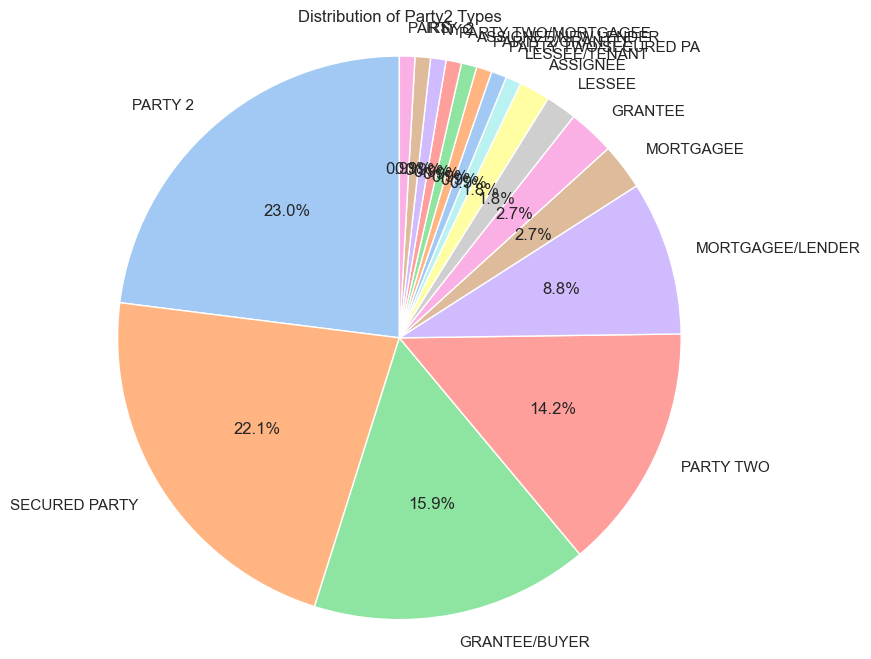

In [31]:
party2_counts = df['PARTY2 TYPE'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(party2_counts, labels=party2_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Party2 Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Visualization 2: Pie Chart of Class Code Descriptions

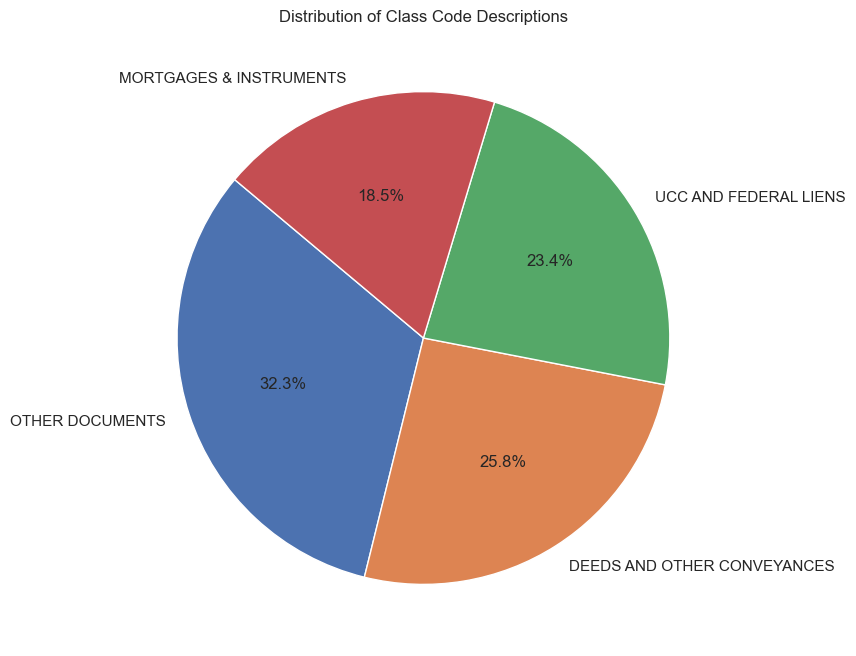

In [20]:
class_counts = df['CLASS CODE DESCRIPTION'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Class Code Descriptions')
plt.show()

Visualization 3: Heatmap of Document Type by Class Code

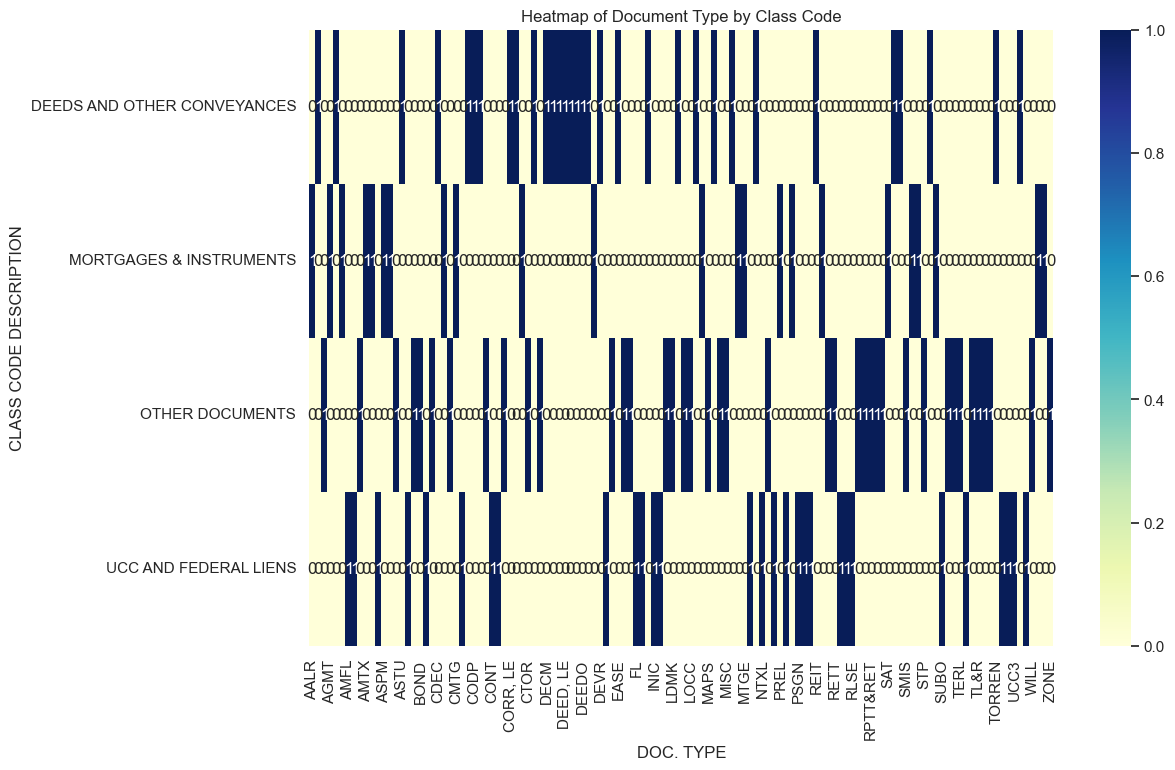

In [24]:
pivot_table = df.pivot_table(index='CLASS CODE DESCRIPTION', columns='DOC. TYPE', values='RECORD TYPE', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Document Type by Class Code')
plt.show()

Visualization 4: Bar Chart of Top 10 Most Frequent Party1 Types

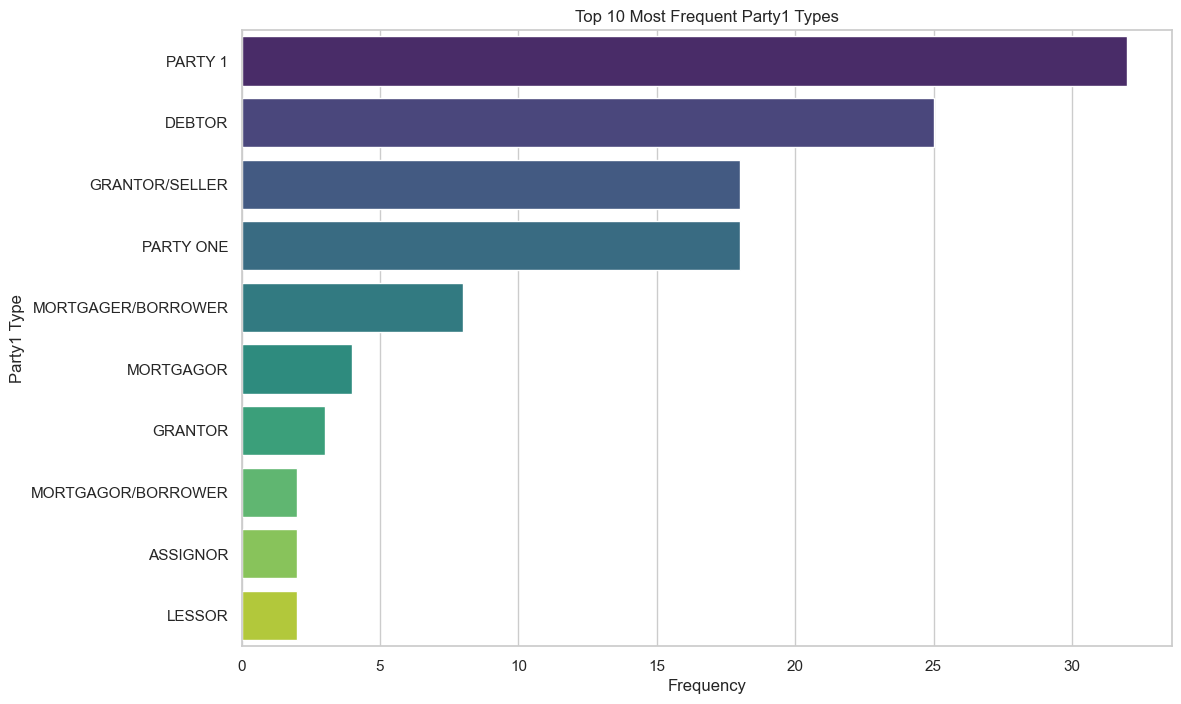

In [27]:
plt.figure(figsize=(12, 8))
party1_counts = df['PARTY1 TYPE'].value_counts().nlargest(10)
sns.barplot(x=party1_counts.values, y=party1_counts.index, palette='viridis')
plt.title('Top 10 Most Frequent Party1 Types')
plt.xlabel('Frequency')
plt.ylabel('Party1 Type')
plt.show()

Visualization 5: Bar Chart of Document Types by Class Code

<Figure size 1400x1000 with 0 Axes>

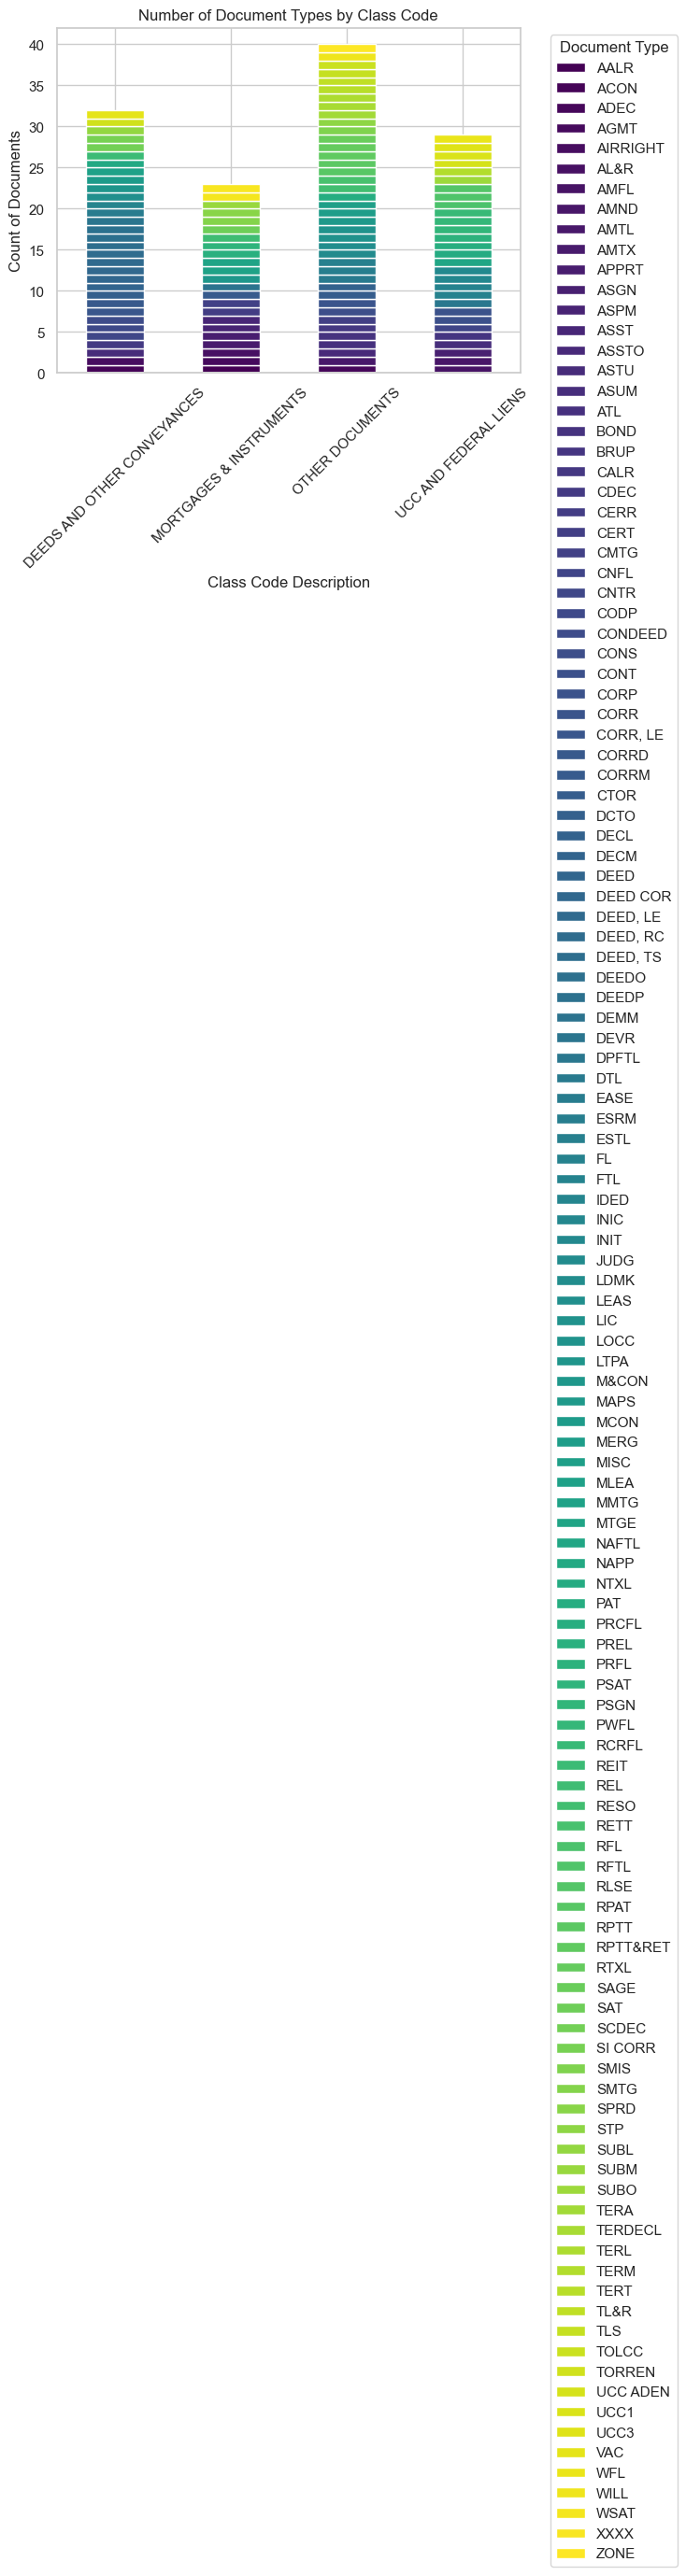

In [30]:
import numpy as np

document_class_counts = df.groupby(['CLASS CODE DESCRIPTION', 'DOC. TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
document_class_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Document Types by Class Code')
plt.xlabel('Class Code Description')
plt.ylabel('Count of Documents')
plt.xticks(rotation=45)
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()